In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as op
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [5]:
 
pip install keras

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [7]:
# visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path + '/*'):  # Corrected train_peth to train_path
    for file in tqdm(glob(category + '/*')):  # Corrected glob(category+*/**) to glob(category+'/*')
        img_array = cv2.imread(file)  # Corrected img array to img_array
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Corrected cv2.cvtColor(ing array to img_array)
        x_data.append(img_array)  # Corrected x_data.oppend to x_data.append
        y_data.append(category.split('/')[-1])

# Create a DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data}) 

100%|██████████| 9999/9999 [00:05<00:00, 1733.29it/s]


In [8]:
data.shape

(22564, 2)

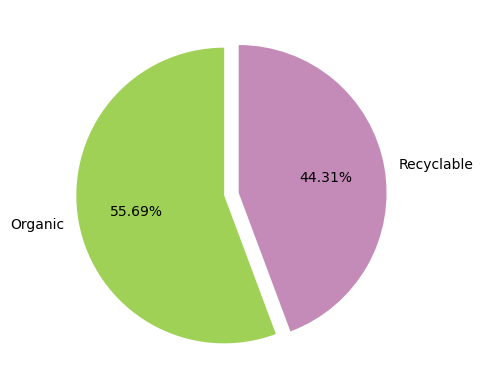

In [9]:
colors = ['#a0d157', '#c48bb8']
plt.pie(
    data.label.value_counts(), 
    labels=['Organic', 'Recyclable'], 
    autopct='%0.2f%%',
    colors=colors,  # Fixed: added `=` between colors and its value
    startangle=90,  # Fixed: added `=` between startangle and its value
    explode=[0.05, 0.05]  # No changes; this was correct
)
plt.show()


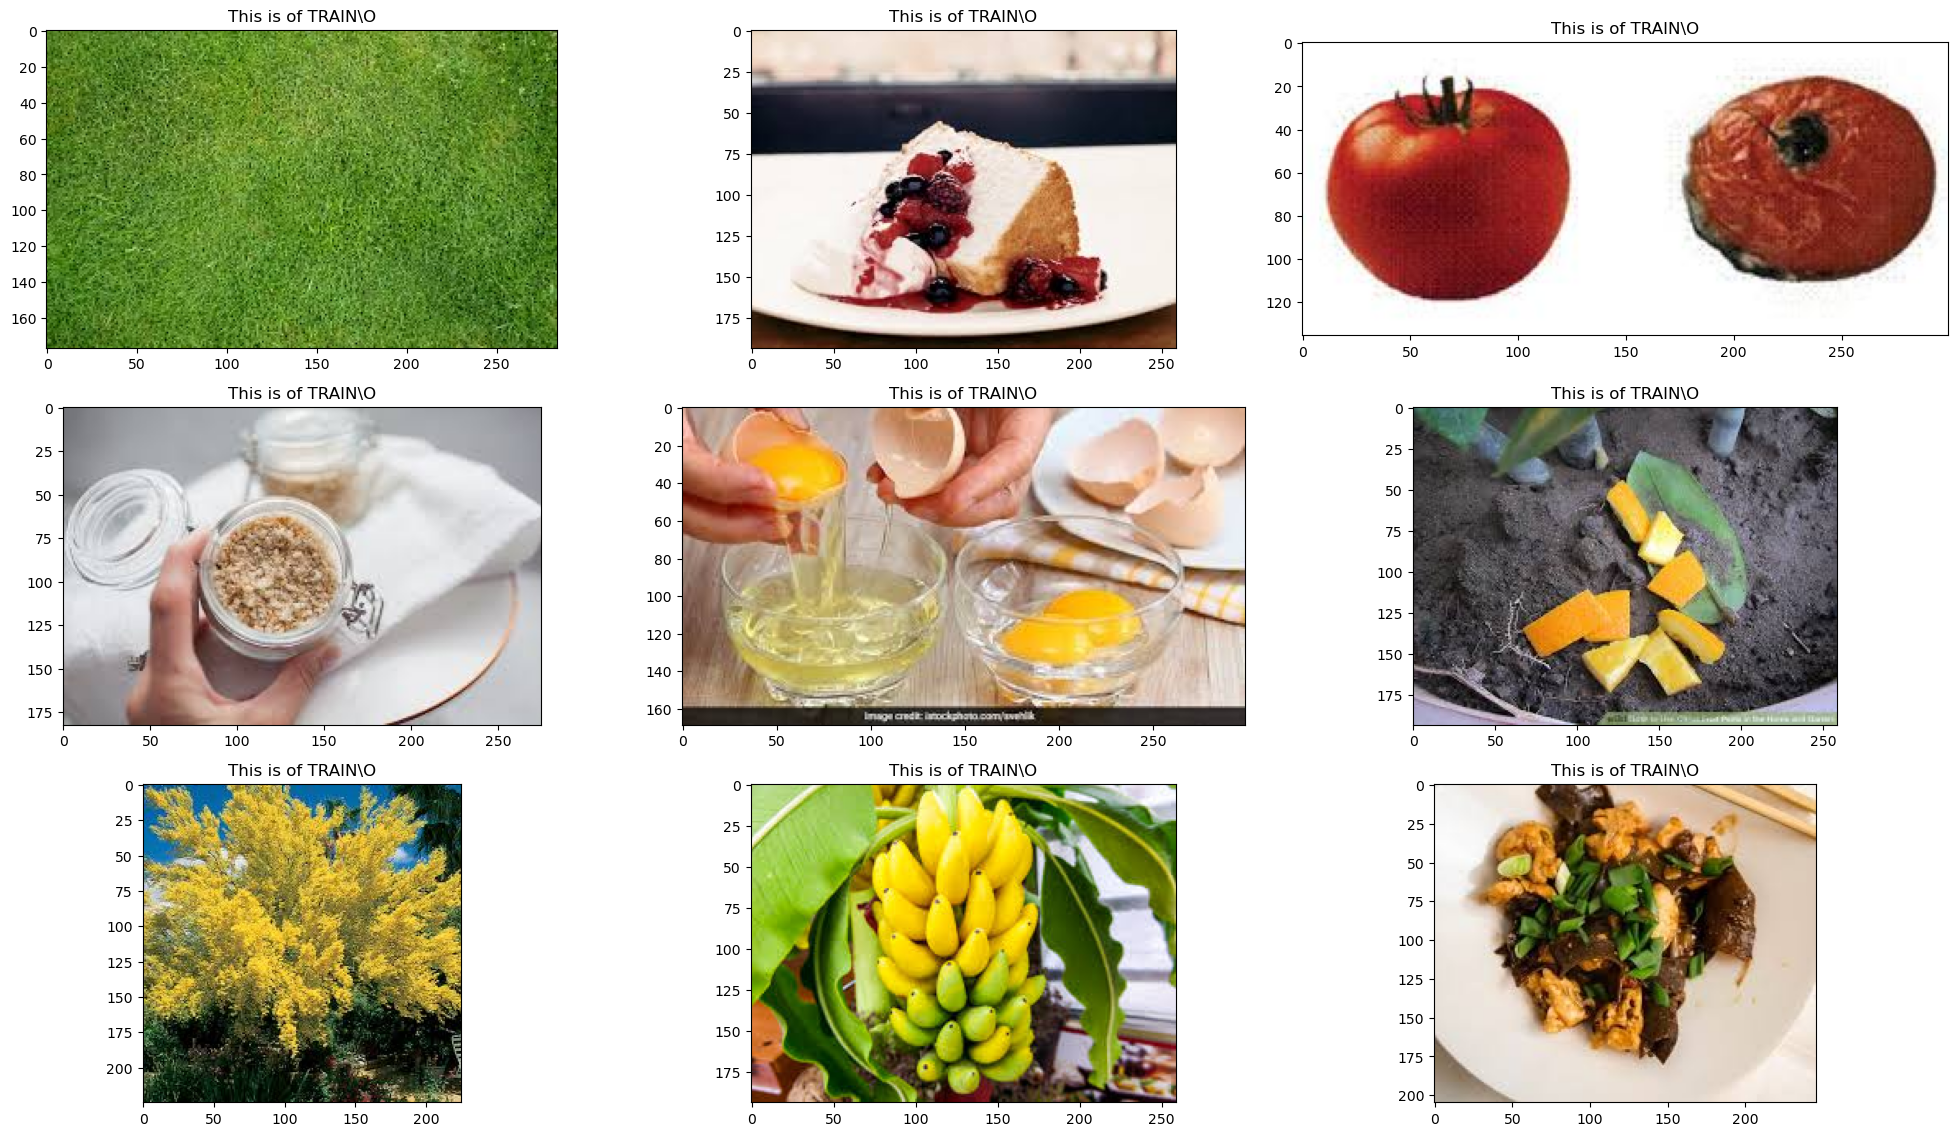

In [10]:

import numpy as np 
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i % 12) + 1)  # Fixed indentation and parentheses
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()  # Ensure proper spacing between subplots


In [11]:
## CNN - Convolutional Neural Network
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 64

In [12]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)


In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate dynamically if the model stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Modify model.fit() to reduce CPU load
hist = model.fit(
    train_generator, 
    epochs=10, 
    steps_per_epoch= 50,  # Reduce steps per epoch to lower CPU usage
    validation_data=test_generator,
    validation_steps=20,  # Reduce validation steps
    callbacks=[reduce_lr]  # Include learning rate scheduler
)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7726 - loss: 0.4875 - val_accuracy: 0.8570 - val_loss: 0.3735 - learning_rate: 0.0010
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8266 - loss: 0.4108 - val_accuracy: 0.8670 - val_loss: 0.3731 - learning_rate: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8201 - loss: 0.4494 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8161 - loss: 0.4609 - val_accuracy: 0.8578 - val_loss: 0.3490 - learning_rate: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8318 - loss: 0.4157 - val_accuracy: 0.8516 - val_loss: 0.3978 - learning_rate: 0.0010
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8321 - loss: 0.4099 - learning_rate: 0.0010
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8236 - loss: 0.4189 - val_accuracy: 0.8875 - val_loss: 0.3456 - learning_rate: 0.0010
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━